In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def poisson_process(lambda_1, max_time):
    time = 0
    events = [0]
    times = [0]
    
    while True:
        u = np.random.uniform()
        time += -np.log(u) / lambda_1
        
        if time > max_time:
            times.append(max_time)
            events.append(events[-1])
            break
        else:
            times.append(time)            
            events.append(events[-1] + 1)
        
    return times, events

In [3]:
lambda_1 = 1
max_time = 90
trajectories = 20

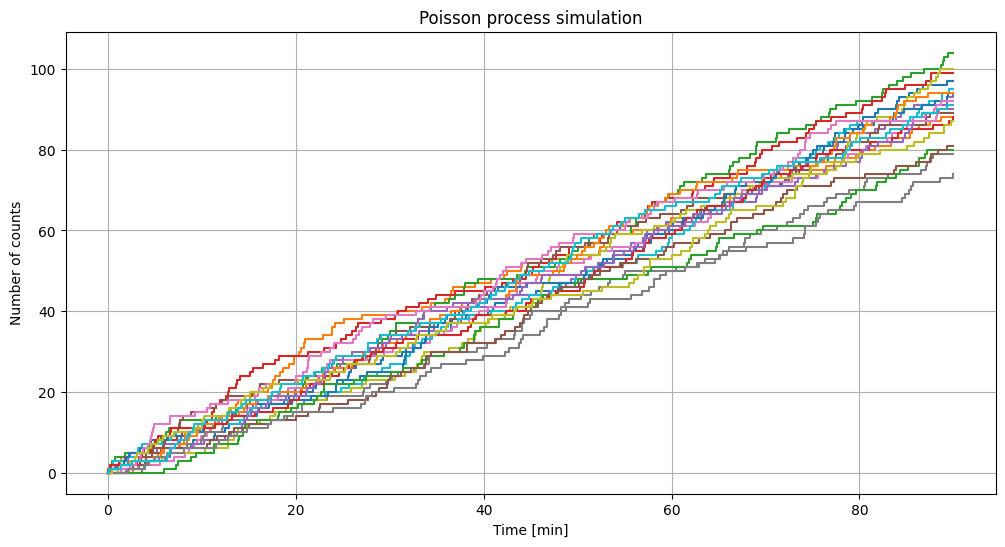

In [4]:
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.xlabel('Time [min]')
plt.ylabel('Number of counts')
plt.title('Poisson process simulation')

for _ in range(trajectories):
    x, y = poisson_process(lambda_1, max_time)
    plt.step(x, y, where='post')

plt.show()

## Stan stacjonarny

Stan stacjonarny procesu Poissona obliczamy jako średnią zliczeń na jednostkę czasu. W przypadku tego zadanie jest to $\lambda_{1}=1 min^{-1}$.

In [5]:
def poisson_process_step(lambda_1, max_time):
    time = 0
    events = [0]
    times = [0]
    
    while True:
        u = np.random.uniform()
        time += -np.log(u) / lambda_1
        
        if time > max_time:
            times.append(max_time)
            events.append(events[-1])
            break
        
        if int(time) == times[-1]:
            events[-1] = events[-1] + 1
        else:
            times.append(int(time))            
            events.append(events[-1] + 1)
        
    return times, events

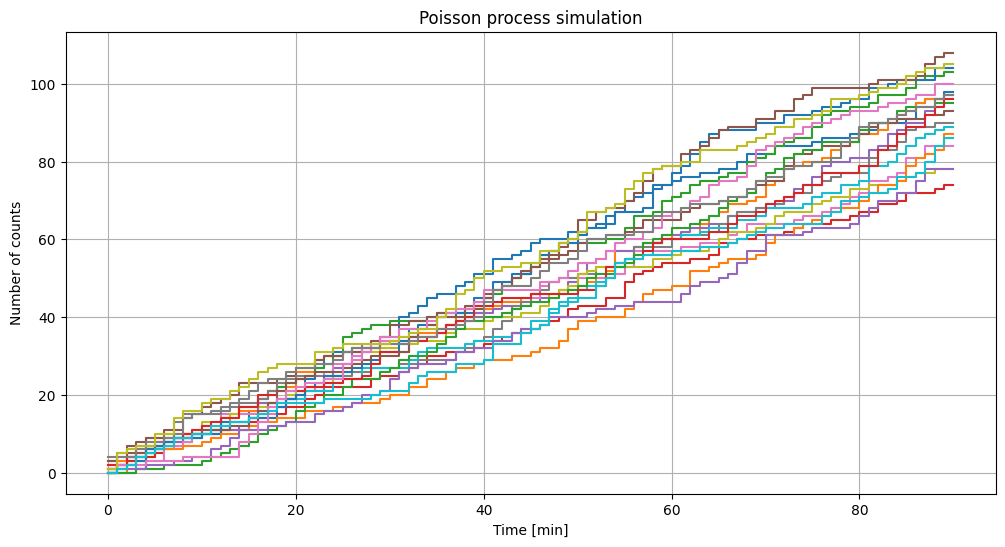

In [6]:
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.xlabel('Time [min]')
plt.ylabel('Number of counts')
plt.title('Poisson process simulation')

for _ in range(trajectories):
    x, y = poisson_process_step(lambda_1, max_time)
    plt.step(x, y, where='post')

plt.show()